# Challenge: Promotions

In this challenge, you'll develop codes to parse and analyze data returned from another API on Zalando such as [Promos homme (Men's Promotions)
](https://www.zalando.fr/promo-homme/) or [Promos femme (Women's Promotions)](https://www.zalando.fr/promo-femme/). The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

In [110]:
# your code here
import json
import requests as req
import pandas as pd
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup as bs
from pylab import *
import matplotlib.pyplot as plt

## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [111]:
# your code here
resp = req.get('https://api.tibiadata.com/v2/latestnews.json')
resp

<Response [200]>

In [112]:
resp_2 = resp.json()
resp_2

{'newslist': {'type': 'latestnews',
  'data': [{'id': 5695,
    'type': 'News',
    'news': 'New Decoration',
    'apiurl': 'http://10.135.56.167/v2/news/5695.json',
    'tibiaurl': 'https://www.tibia.com/news/?subtopic=newsarchive&id=5695',
    'date': {'date': '2020-08-14 00:00:00.000000',
     'timezone_type': 3,
     'timezone': 'Europe/Berlin'}},
   {'id': 5692,
    'type': 'Featured Article',
    'news': 'Character Auction Overview and FAQ',
    'apiurl': 'http://10.135.56.167/v2/news/5692.json',
    'tibiaurl': 'https://www.tibia.com/news/?subtopic=newsarchive&id=5692',
    'date': {'date': '2020-08-13 00:00:00.000000',
     'timezone_type': 3,
     'timezone': 'Europe/Berlin'}},
   {'id': 5691,
    'type': 'News',
    'news': 'Character Auctions',
    'apiurl': 'http://10.135.56.167/v2/news/5691.json',
    'tibiaurl': 'https://www.tibia.com/news/?subtopic=newsarchive&id=5691',
    'date': {'date': '2020-08-13 00:00:00.000000',
     'timezone_type': 3,
     'timezone': 'Europe/B

In [113]:
resp.headers

{'Server': 'nginx/1.19.1', 'Date': 'Wed, 19 Aug 2020 04:05:33 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '17051', 'Access-Control-Allow-Origin': '*'}

In [114]:
df.head

<bound method NDFrame.head of       id              type                                          news  \
0   5695              News                                New Decoration   
1   5692  Featured Article            Character Auction Overview and FAQ   
2   5691              News                            Character Auctions   
3   5661              News                Sign-Up for VALOUR Has Started   
4   5669              News                           Double Loot Weekend   
5   5664              News  Bugfixes, Content Changes, Balancing Changes   
6   5662              News         Result of Fugue Exploit Investigation   
7   5659              News            New Retro Hardcore PvP Game Worlds   
8   5658              News                  Bugfixes and Content Changes   
9   5622              News                            Summer Update 2020   
10  5630              News                                    New Mounts   
11  5633              News                           Test 

In [115]:
resp_2 = resp.json()['newslist']['data']
df = pd.DataFrame(resp_2)

In [116]:
df

,id,type,news,apiurl,tibiaurl,date
0,5695,News,New Decoration,http://10.135.56.167/v2/news/5695.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-08-14 00:00:00.000000', 'timezo..."
1,5692,Featured Article,Character Auction Overview and FAQ,http://10.135.56.167/v2/news/5692.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-08-13 00:00:00.000000', 'timezo..."
2,5691,News,Character Auctions,http://10.135.56.167/v2/news/5691.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-08-13 00:00:00.000000', 'timezo..."
3,5661,News,Sign-Up for VALOUR Has Started,http://10.135.56.167/v2/news/5661.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-08-10 00:00:00.000000', 'timezo..."
4,5669,News,Double Loot Weekend,http://10.135.56.167/v2/news/5669.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-07-31 00:00:00.000000', 'timezo..."
5,5664,News,"Bugfixes, Content Changes, Balancing Changes",http://10.135.56.167/v2/news/5664.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-07-28 00:00:00.000000', 'timezo..."
6,5662,News,Result of Fugue Exploit Investigation,http://10.135.56.167/v2/news/5662.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-07-23 00:00:00.000000', 'timezo..."
7,5659,News,New Retro Hardcore PvP Game Worlds,http://10.135.56.167/v2/news/5659.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-07-22 00:00:00.000000', 'timezo..."
8,5658,News,Bugfixes and Content Changes,http://10.135.56.167/v2/news/5658.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-07-21 00:00:00.000000', 'timezo..."
9,5622,News,Summer Update 2020,http://10.135.56.167/v2/news/5622.json,https://www.tibia.com/news/?subtopic=newsarchi...,"{'date': '2020-07-13 00:00:00.000000', 'timezo..."


In [117]:
type(resp)

requests.models.Response

In [118]:
type(resp_2)

list

In [119]:
list(df.columns)

['id', 'type', 'news', 'apiurl', 'tibiaurl', 'date']

In [120]:
df.shape

(60, 6)

In [121]:
flat_json=json_normalize(resp.json())

<ipython-input-121-9433f0c6a790>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  flat_json=json_normalize(resp.json())


Bonus
Extract the following information from the data:
The trending brand.
The product(s) with the highest discount.
The sum of discounts of all goods (sum_discounted_prices divided by sum_original_prices).


In [122]:
df['type'].unique()

array(['News', 'Featured Article'], dtype=object)

In [123]:
df['type'].value_counts()[:2]

News                58
Featured Article     2
Name: type, dtype: int64

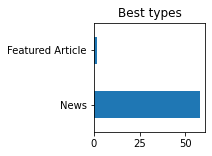

In [124]:
df['type'].value_counts().plot(kind='barh', figsize=(2,2), title='Best types')